# **1° Passo:** Instalando as bibliotecas

In [13]:
!pip install -q proplot calplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


- Chegando aqui, será necessário fazer a `Reinicialização do Ambiente de Execução`. Para isto, você deverá acessar `Ambiente de execução`, localizado na barra de ferramentas e clicar em `Reiniciar Sessão`. Como indicado na imagem abaixo.

- Em seguida você deverá rodar novamente a célula anterior de instalações, de forma que as bibliotecas sejam instaladas novamente.

- Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab. Então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual da disciplina.

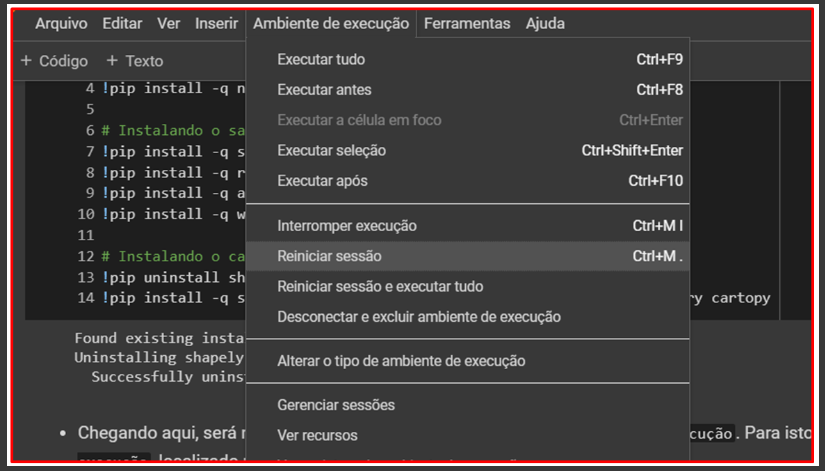

# **2° Passo:** Importando bibliotecas

In [15]:
import numpy as np
import proplot as pplt
import matplotlib.pyplot as plt
import pandas as pd
import calplot
import time

# vamos ignorar vários avisos
import warnings
warnings.filterwarnings('ignore')

#Leitura dos dados de focos de calor

Vamos plotar uma figura que mostra a distrbuição de ocorrência de focos de calor por `dia da semana` e `mês`. Para isto usaremos a biblioteca [calplot](https://calplot.readthedocs.io/en/latest/).

In [17]:
%%time
# leitura dos dados
df_2017 = pd.read_csv('https://github.com/evmpython/graficos_gerais/raw/main/input/Focos_2017-01-01_2017-12-31.csv')
df_2018 = pd.read_csv('https://github.com/evmpython/graficos_gerais/raw/main/input/Focos_2018-01-01_2018-12-31.csv')
df_2019 = pd.read_csv('https://github.com/evmpython/graficos_gerais/raw/main/input/Focos_2019-01-01_2019-12-31.csv')
df_2020 = pd.read_csv('https://github.com/evmpython/graficos_gerais/raw/main/input/Focos_2020-01-01_2020-12-31.csv')

# seleciona os focos detectados apenas pelo satélite AQUA_M-T
df_2017 = df_2017[ df_2017['satelite'] == 'AQUA_M-T' ]
df_2018 = df_2018[ df_2018['satelite'] == 'AQUA_M-T' ]
df_2019 = df_2019[ df_2019['satelite'] == 'AQUA_M-T' ]
df_2020 = df_2020[ df_2020['satelite'] == 'AQUA_M-T' ]

# transforma a coluna "datahora" para o formato "datetime"
df_2017['datahora'] = pd.to_datetime(df_2017['datahora'])
df_2018['datahora'] = pd.to_datetime(df_2018['datahora'])
df_2019['datahora'] = pd.to_datetime(df_2019['datahora'])
df_2020['datahora'] = pd.to_datetime(df_2020['datahora'])

# seta a coluna "datahora" como o índice da tabela
df_2017.set_index('datahora', inplace=True)
df_2018.set_index('datahora', inplace=True)
df_2019.set_index('datahora', inplace=True)
df_2020.set_index('datahora', inplace=True)

# mostra a tabela de 2017
df_2017

CPU times: user 636 ms, sys: 104 ms, total: 740 ms
Wall time: 2.08 s


,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
datahora,,,,,,,,,,,
2017-01-05 16:18:00,AQUA_M-T,Brasil,MINAS GERAIS,OURO PRETO,Mata Atlantica,0,0.9,0.7,-20.608,-43.510,NaN
2017-02-20 16:31:00,AQUA_M-T,Brasil,MINAS GERAIS,FORTALEZA DE MINAS,Mata Atlantica,0,0.0,0.3,-20.874,-46.796,NaN
2017-01-08 16:49:00,AQUA_M-T,Brasil,MINAS GERAIS,PASSOS,Cerrado,0,6.5,-999.0,-20.708,-46.620,NaN
2017-01-08 16:49:00,AQUA_M-T,Brasil,MINAS GERAIS,IBIA,Cerrado,0,0.5,0.7,-19.511,-46.654,NaN
2017-01-08 16:49:00,AQUA_M-T,Brasil,MINAS GERAIS,GUARDA-MOR,Cerrado,0,0.0,1.0,-17.766,-46.932,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2017-10-19 17:13:00,AQUA_M-T,Brasil,MINAS GERAIS,OURO PRETO,Mata Atlantica,0,0.0,1.0,-20.323,-43.470,NaN
2017-10-19 17:13:00,AQUA_M-T,Brasil,MINAS GERAIS,OURO PRETO,Mata Atlantica,0,0.0,0.9,-20.376,-43.595,NaN
2017-11-21 16:20:00,AQUA_M-T,Brasil,MINAS GERAIS,MATIAS CARDOSO,Caatinga,0,0.3,1.0,-15.093,-43.688,NaN


#Agrupando os dados por dia

In [18]:
%%time
# agrupa os dados por dia
df_2017_dia = df_2017.groupby('estado').get_group('MINAS GERAIS').groupby(pd.Grouper(freq='1D')).count()['estado']
df_2018_dia = df_2018.groupby('estado').get_group('MINAS GERAIS').groupby(pd.Grouper(freq='1D')).count()['estado']
df_2019_dia = df_2019.groupby('estado').get_group('MINAS GERAIS').groupby(pd.Grouper(freq='1D')).count()['estado']
df_2020_dia = df_2020.groupby('estado').get_group('MINAS GERAIS').groupby(pd.Grouper(freq='1D')).count()['estado']

# mostra os dados de 2017
df_2017_dia

CPU times: user 51.7 ms, sys: 0 ns, total: 51.7 ms
Wall time: 52.4 ms


datahora
2017-01-01     2
2017-01-02     0
2017-01-03    21
2017-01-04     0
2017-01-05    17
              ..
2017-12-26     4
2017-12-27     0
2017-12-28    13
2017-12-29     0
2017-12-30     1
Freq: D, Name: estado, Length: 364, dtype: int64

In [45]:
np.sum(df_2017_dia.values)

8383

#Plota figura

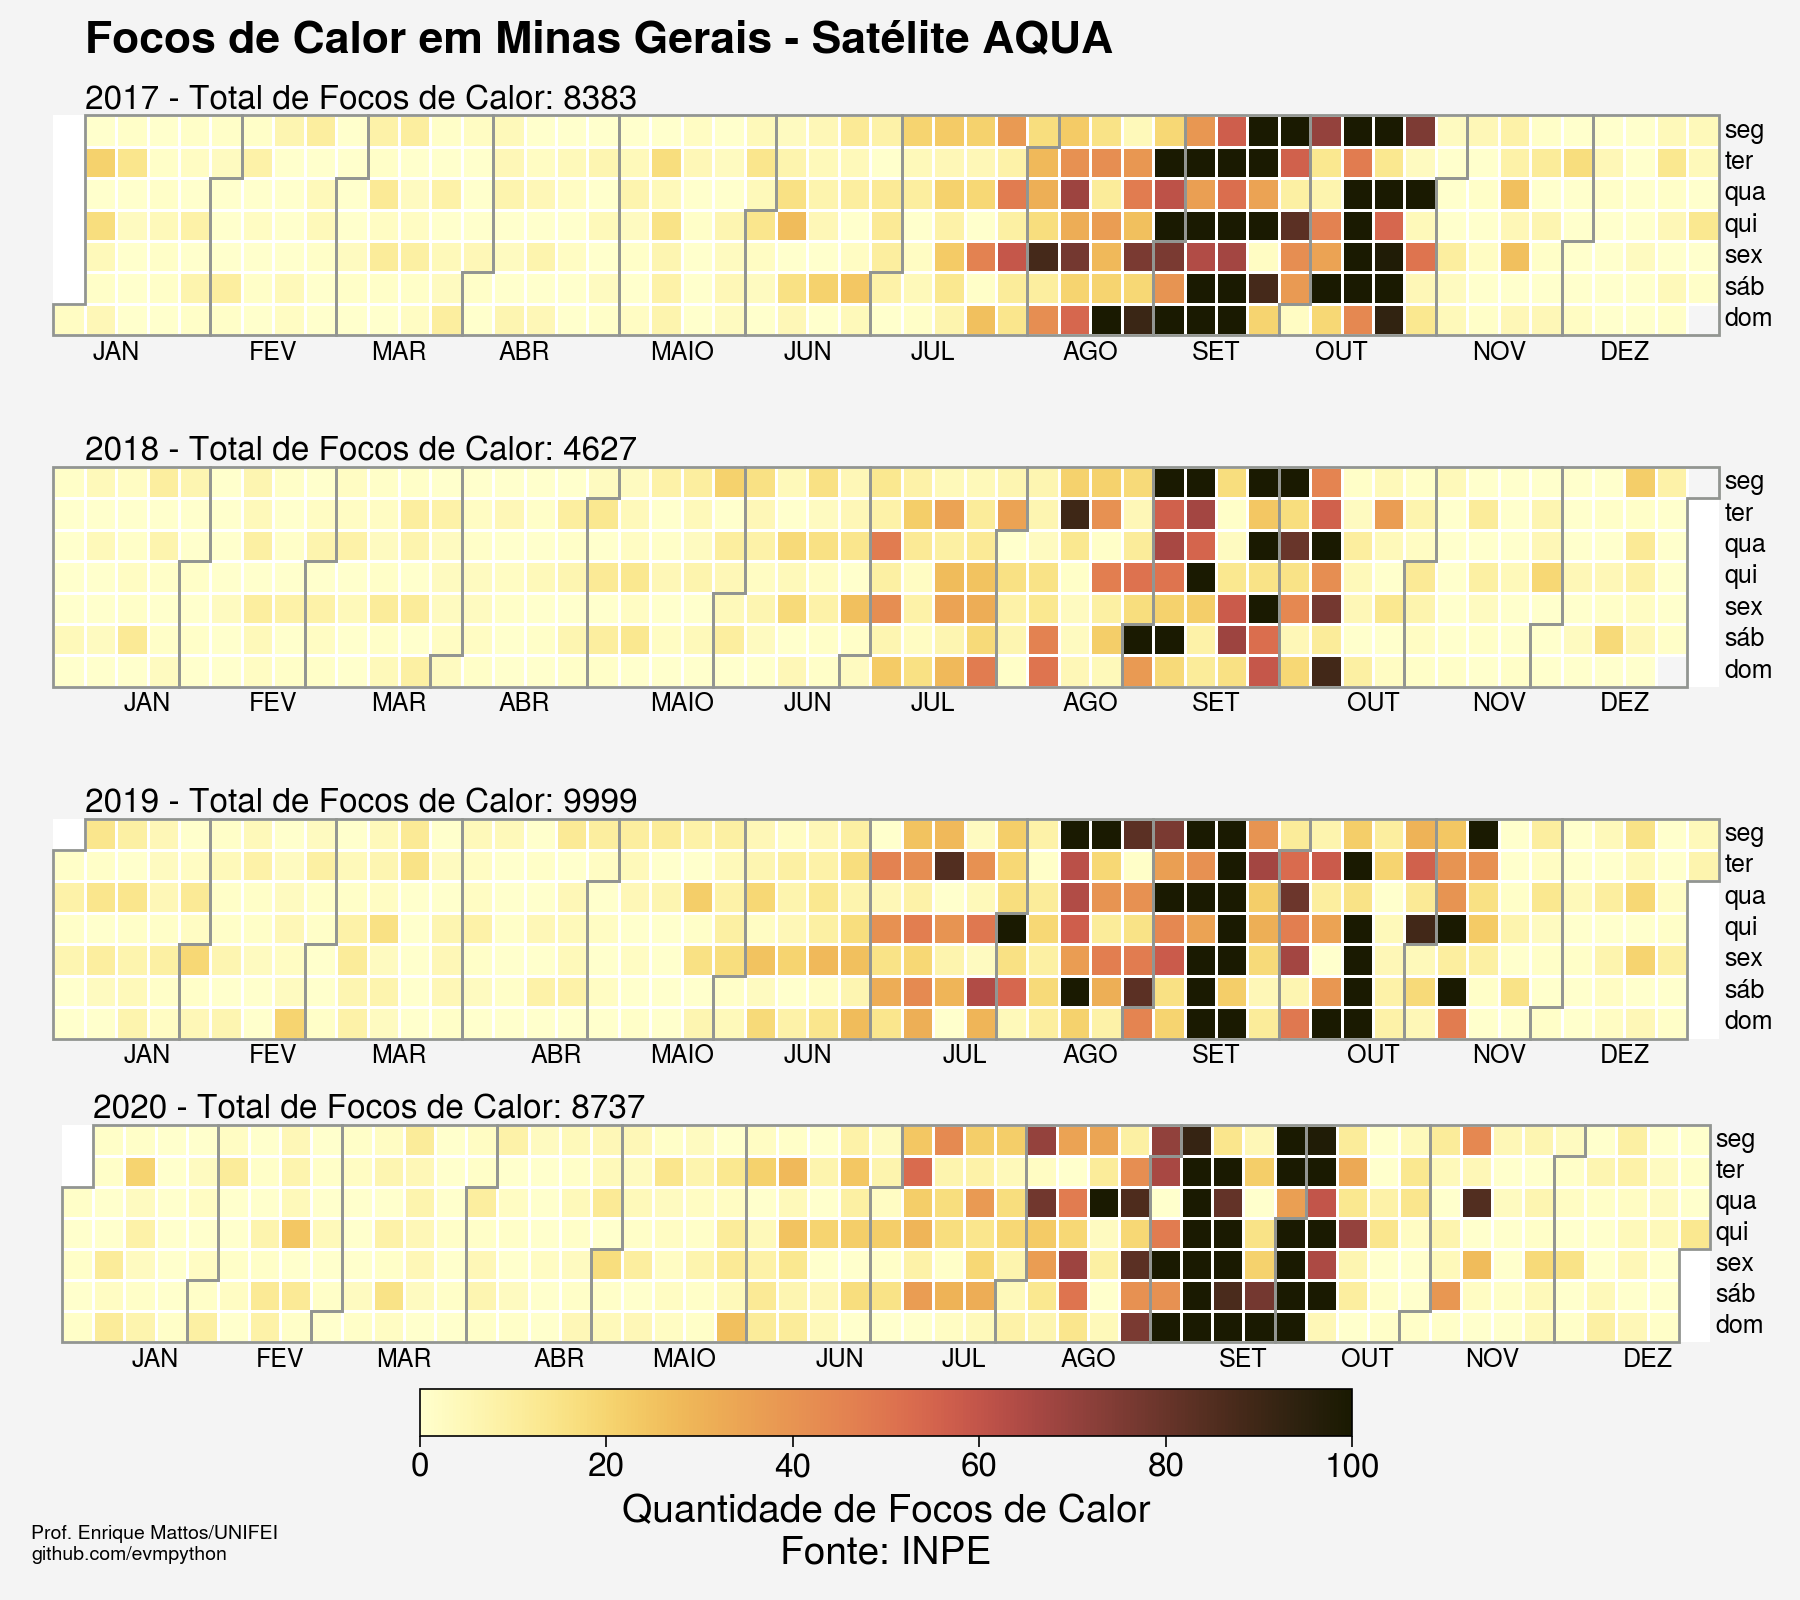

CPU times: user 2.22 s, sys: 114 ms, total: 2.33 s
Wall time: 2.22 s


In [46]:
%%time
#========================================================#
#               DEFINIÇÕES INICIAIS
#========================================================#
# moldura da figura
fig, ax = plt.subplots(figsize=(9,8), nrows=4)

# labels dos "dias da semana" e "meses do ano"
dias = ['seg', 'ter', 'qua', 'qui', 'sex','sáb', 'dom']
meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAIO', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']

#========================================================#
#                 FIGURA A) - 2017
#========================================================#
map1 = calplot.yearplot(df_2017_dia,
                        cmap='lajolla',
                        daylabels=dias,
                        monthlabels=meses,
                        vmin=0,
                        vmax=100,
                        ax=ax[0])

#========================================================#
#                  FIGURA B) - 2018
#========================================================#
calplot.yearplot(df_2018_dia,
                 cmap='lajolla',
                 daylabels=dias,
                 monthlabels=meses,
                 vmin=0,
                 vmax=100,
                 ax=ax[1])

#========================================================#
#                  FIGURA C) - 2019
#========================================================#
calplot.yearplot(df_2019_dia,
                 cmap='lajolla',
                 daylabels=dias,
                 monthlabels=meses,
                 vmin=0,
                 vmax=100,
                 ax=ax[2])

#========================================================#
#                  FIGURA D) - 2020
#========================================================#
calplot.yearplot(df_2020_dia,
                 cmap='lajolla',
                 daylabels=dias,
                 monthlabels=meses,
                 vmin=0,
                 vmax=100,
                 ax=ax[3])

#========================================================#
#                  DEMAIS DEFINIÇÕES
#========================================================#
# barra de cores
cb = fig.colorbar(map1.get_children()[1],
                  orientation='horizontal',
                  ticks=pplt.arange(0, 100, 20),
                  shrink=0.75,
                  ax=ax[3])

cb.ax.tick_params(labelsize=12)
cb.ax.tick_params(which='minor', width=0)
cb.set_label('Quantidade de Focos de Calor\nFonte: INPE', fontsize=14)

# textos
ax[0].text(1., 9., 'Focos de Calor em Minas Gerais - Satélite AQUA', fontsize=16, color='black', fontweight='bold')
ax[0].text(1., 7.2, f'2017 - Total de Focos de Calor: {np.sum(df_2017_dia.values)}', fontsize=12, color='black')
ax[1].text(1., 7.2, f'2018 - Total de Focos de Calor: {np.sum(df_2018_dia.values)}', fontsize=12, color='black')
ax[2].text(1., 7.2, f'2019 - Total de Focos de Calor: {np.sum(df_2019_dia.values)}', fontsize=12, color='black')
ax[3].text(1., 7.2, f'2020 - Total de Focos de Calor: {np.sum(df_2020_dia.values)}', fontsize=12, color='black')

# informação na figura
ax[3].text(-1, -7., 'Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', fontsize=7, color='black')

# salva figura
plt.tight_layout()
plt.savefig('calendar_plot.jpg', bbox_inches='tight', dpi=300)
plt.show()